Vi begynner med å gjøre noen imports som er nødvendige for resten av koden i denne fila. Denne kan du bare kjøre uten å tenke så mye mer over hva den gjør 😉

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import sklearn

## Lineær regresjon

Vi begynner med å ta en titt på den aller enkleste formen for regresjon, som mange av oss nok har hatt om i matematikk på videregående; nemlig linear regresjon. Dette lar oss tilpasse en rett linje til et datasett – med andre ord ikke en veldig kraftig modell. Fordelen er at dette er et matematisk enkelt problem, som kan løses analytisk.

### Datalasting
Vi begynner med å laste inn datasettet. Vi skal her se på et datasett om været i den ungarske byen Szeged i perioden 2006-2016 (https://www.kaggle.com/datasets/budincsevity/szeged-weather).

Kjør de to neste blokkene for å laste ned datafilen, laste den med pandas, og printe de første linjene slik at vi kan bli litt kjent med hva den inneholder.

In [2]:
!wget https://github.com/eivindlie/ml-workshop-2025/raw/refs/heads/main/data/weather-in-szeged/weatherHistory.csv

--2025-03-15 11:07:24--  https://github.com/eivindlie/ml-workshop-2025/raw/refs/heads/main/data/weather-in-szeged/weatherHistory.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/eivindlie/ml-workshop-2025/refs/heads/main/data/weather-in-szeged/weatherHistory.csv [following]
--2025-03-15 11:07:24--  https://raw.githubusercontent.com/eivindlie/ml-workshop-2025/refs/heads/main/data/weather-in-szeged/weatherHistory.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16294377 (16M) [text/plain]
Saving to: ‘weatherHistory.csv’

weatherHistory.csv  100%[===================>]  15.54M  --.-KB/s    in 

In [14]:
df = pd.read_csv("weatherHistory.csv")
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


Dette er et forholdsvis stort datasett, så vi velger ut bare data fra 2010 for å gjøre det litt mer håndterbart.

In [17]:
df_2010 = df[(df['Formatted Date'] >= '2010-01-01') & (df['Formatted Date'] <= '2010-12-31')]


### Utforskende plots
Vi ser at datasettet inneholder tidsseriedata om været i byen, med blant annet faktisk temperatur, opplevd temperatur og luftfuktighet. La oss ta en titt på hvordan forholdet mellom temperatur og luftfuktighet ser ut, og det samme for faktisk temperatur og opplevd temperatur.

<Axes: xlabel='Humidity', ylabel='Temperature (C)'>

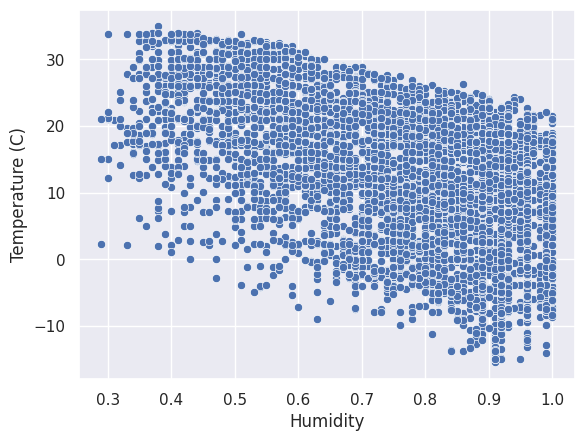

In [23]:
sns.scatterplot(data=df_2010, x='Humidity', y='Temperature (C)')

<Axes: xlabel='Apparent Temperature (C)', ylabel='Temperature (C)'>

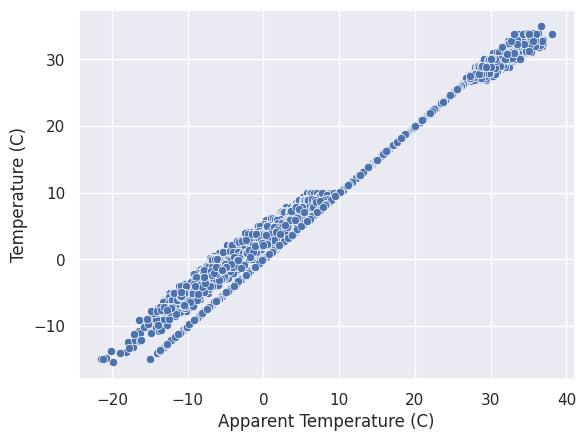

In [24]:
sns.scatterplot(data=df_2010, x='Apparent Temperature (C)', y='Temperature (C)')

Her ser vi hvor mye informasjon et enkelt scatter plot kan gi for enkle sammenhenger som dette her. Vi ser at det er en viss lineær korrelasjon mellom temperatur og luftfuktighet, og en kraftig korrelasjon mellom opplevd temperatur og faktisk temperatur. La oss tilpasse en lineær modell for begge forholdene!

### Tilpassing av modell

In [26]:
humidity_model = sklearn.linear_model.LinearRegression()
humidity_model.fit(df_2010[['Humidity']], df_2010['Temperature (C)'])

LinearRegression()

In [27]:
temp_model = sklearn.linear_model.LinearRegression()
temp_model.fit(df_2010[['Apparent Temperature (C)']], df_2010['Temperature (C)'])

LinearRegression()

### Plotting av resultat

Vi kan nå gjenta de samme plottene sammen med linjen som modellen vår predikerer for å se hvordan modellen treffer:

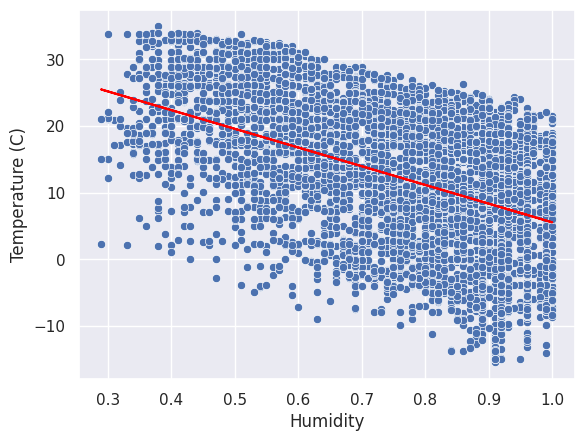

In [28]:
humidity_pred = humidity_model.predict(df_2010[['Humidity']])
sns.scatterplot(data=df_2010, x='Humidity', y='Temperature (C)')
plt.plot(df_2010['Humidity'], humidity_pred, color='red')

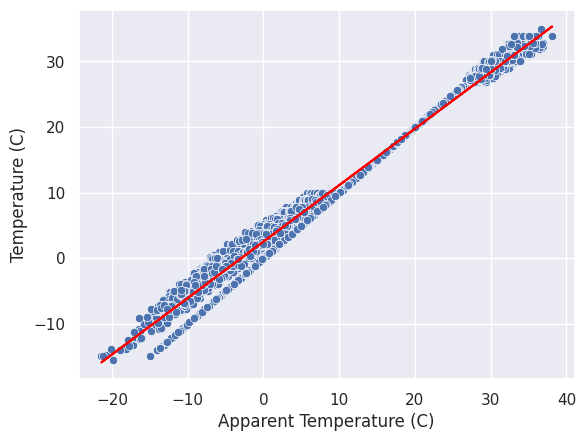

In [29]:
temp_pred = temp_model.predict(df_2010[['Apparent Temperature (C)']])
sns.scatterplot(data=df_2010, x='Apparent Temperature (C)', y='Temperature (C)')
plt.plot(df_2010['Apparent Temperature (C)'], temp_pred, color='red')

### Generalisering til nye observasjoner

Siden vi valgte ut kun 2010-dataene for å tilpasse modellene, har vi nå muligheten til å sjekke om modellen har fanget et forhold som er generaliserbart til andre år. La oss gjenta de samme plottene for 2011:

In [30]:
df_2011 = df[(df['Formatted Date'] >= '2011-01-01') & (df['Formatted Date'] <= '2011-12-31')]

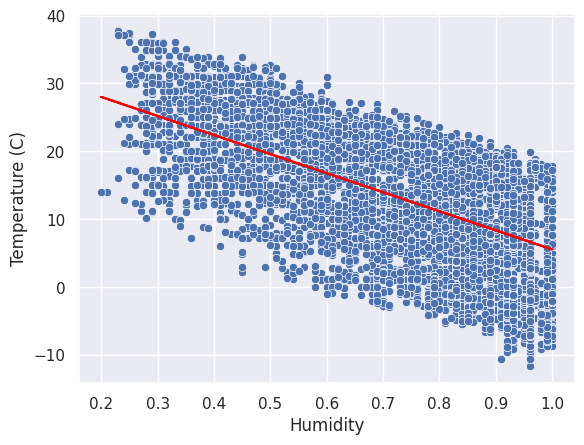

In [31]:
humidity_pred_2011 = humidity_model.predict(df_2011[['Humidity']])
sns.scatterplot(data=df_2011, x='Humidity', y='Temperature (C)')
plt.plot(df_2011['Humidity'], humidity_pred_2011, color='red')

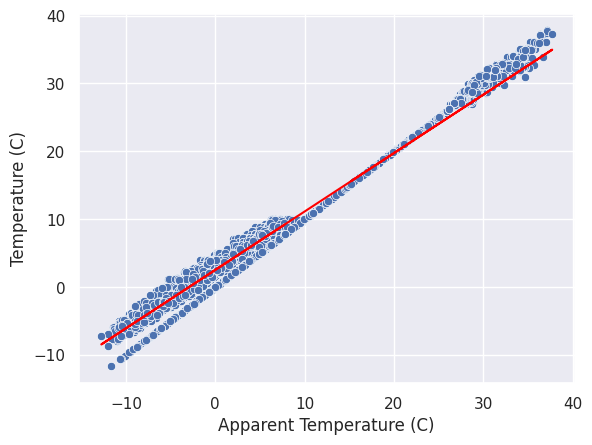

In [32]:
temp_pred_2011 = temp_model.predict(df_2011[['Apparent Temperature (C)']])
sns.scatterplot(data=df_2011, x='Apparent Temperature (C)', y='Temperature (C)')
plt.plot(df_2011['Apparent Temperature (C)'], temp_pred_2011, color='red')

Det ser ut til at modellene våre har fanget en sammenheng som treffer godt også i et år vi ikke brukte under tilpasningen av modellene.

### Ekstraoppgave 1
Vi har nå sett på lineære forhold mellom noen av dataene i datasettet. Det finnes flere data som vi ikke har utforsket. Finnes det noen av disse du tror kan være interessante for en liknende analyse? Lag noen plott og tilpass modeller der du tror det kan passe.

### Ekstraoppgave 2
Vi brukte her scatter plots, som er en effektiv visuell måte å undersøke forholdet mellom to variabler. For lineær korrelasjon finnes også Pearsons korrelasjonskoeffisient, som er et tall som angir hvor godt sammenhengen mellom to variabler passer til en rett linje. Undersøk hvordan du kan regne ut denne med sklearn. Kanskje du kan lage en matrise som viser forholdet mellom alle par av variabler, og på den måten raskt se hvilke sammenhenger som kan være interessant å undersøke nærmere?